In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/avalanche/avalanche (3).csv',sep='\t')
df.head()

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out
0,0,0,4,3.900508,8.715485,6,9,0
1,1,0,9,1.477586,6.801417,30,0,0
2,2,1,3,3.236594,5.632457,8,8,1
3,3,0,0,3.244283,9.348871,12,10,0
4,4,1,2,5.196741,3.782315,4,9,1


In [3]:
df.tail()

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out
1090,1090,1,1,2.182905,6.109184,3,9,0
1091,1091,0,2,3.718231,10.426100,28,0,0
1092,1092,1,8,7.037647,9.741006,34,3,0
1093,1093,0,2,2.449889,7.337579,37,10,1
1094,1094,1,3,4.881081,10.457047,9,7,0


In [4]:
df

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out
0,0,0,4,3.900508,8.715485,6,9,0
1,1,0,9,1.477586,6.801417,30,0,0
2,2,1,3,3.236594,5.632457,8,8,1
3,3,0,0,3.244283,9.348871,12,10,0
4,4,1,2,5.196741,3.782315,4,9,1
...,...,...,...,...,...,...,...,...
1090,1090,1,1,2.182905,6.109184,3,9,0
1091,1091,0,2,3.718231,10.426100,28,0,0
1092,1092,1,8,7.037647,9.741006,34,3,0
1093,1093,0,2,2.449889,7.337579,37,10,1


In [5]:
df.isnull().sum()

Unnamed: 0         0
avalanche          0
no_visitors        0
surface_hoar       0
fresh_thickness    0
wind               0
weak_layers        0
tracked_out        0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'avalanche', 'no_visitors', 'surface_hoar',
       'fresh_thickness', 'wind', 'weak_layers', 'tracked_out'],
      dtype='object')

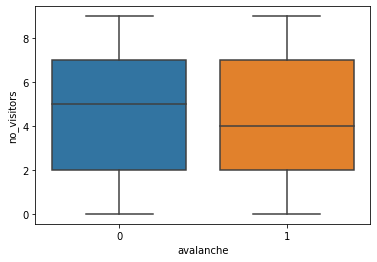

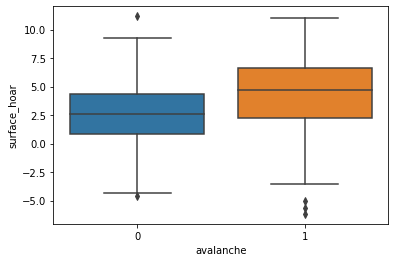

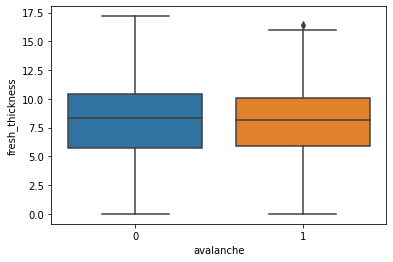

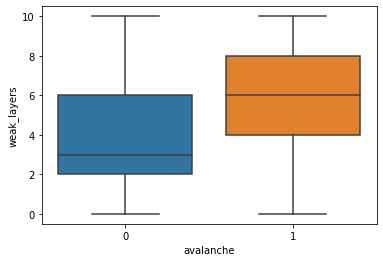

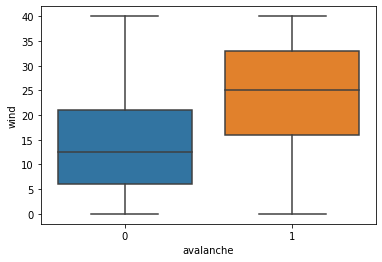

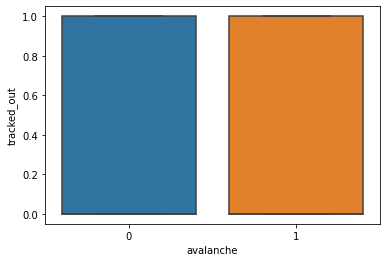

In [7]:
cols = ['no_visitors','surface_hoar','fresh_thickness','weak_layers','wind','tracked_out']

for col in cols:
    sns.boxplot(x='avalanche',y=col,data=df)
    plt.show()

In [8]:
X = df[df.columns.drop("avalanche")]
y = df[['avalanche']]

In [9]:
X.head()

,Unnamed: 0,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out
0,0,4,3.900508,8.715485,6,9,0
1,1,9,1.477586,6.801417,30,0,0
2,2,3,3.236594,5.632457,8,8,1
3,3,0,3.244283,9.348871,12,10,0
4,4,2,5.196741,3.782315,4,9,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (657, 7) (657, 1)
Test set: (438, 7) (438, 1)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
lr = LogisticRegression(max_iter = 10000, solver='liblinear')
C = [0.0001,0.001,0.002,0.003,0.004,0.01,0.1,0.2,0.3,0.4,1.0,2.0]
scores = []
for choice in C:
    lr.set_params(C=choice)
    lr.fit(X_train,y_train)
    scores.append(lr.score(X_test,y_test))

print(scores)

[0.7785388127853882, 0.7785388127853882, 0.7808219178082192, 0.7808219178082192, 0.7808219178082192, 0.776255707762557, 0.7808219178082192, 0.7808219178082192, 0.7785388127853882, 0.7785388127853882, 0.7785388127853882, 0.7785388127853882]


In [13]:
LR = LogisticRegression(C=0.004,solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.004, solver='liblinear')

In [14]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [15]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.44711355, 0.55288645],
       [0.22370287, 0.77629713],
       [0.56444787, 0.43555213],
       [0.54918425, 0.45081575],
       [0.47758916, 0.52241084]])

In [16]:
JaccardIndex = jaccard_score(y_test, yhat,pos_label=0)
print(JaccardIndex)

0.5733333333333334


In [17]:
## Lets Get the Score
LR.score(X_test,y_test)

0.7808219178082192

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, yhat)

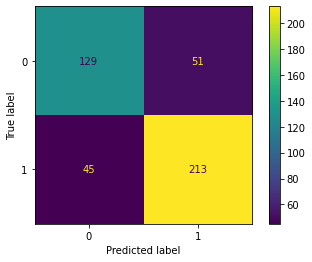

In [19]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0,1])
cm_display.plot()
plt.show()

In [20]:
## Accuracy
Accuracy = metrics.accuracy_score(y_test,yhat)
print("Accuracy: ", Accuracy)

Accuracy:  0.7808219178082192


In [21]:
## Precision
Precision = metrics.precision_score(y_test,yhat)
print("Precision: ", Precision)

Precision:  0.8068181818181818


In [22]:
## Sensitivity
Sensitivity = metrics.recall_score(y_test,yhat)
print("Sensitivity: ", Sensitivity)

Sensitivity:  0.8255813953488372


In [23]:
## F1 Score
F1_score = metrics.f1_score(y_test,yhat)
print("F1 SCORE: ", F1_score)

F1 SCORE:  0.8160919540229885


In [24]:
logloss= metrics.log_loss(y_test,yhat)
print("Log_Loss: ", logloss)

Log_Loss:  7.570235875297638


In [25]:
LR.score = pd.DataFrame({'Accuracy':[Accuracy],'JaccardIndex':[JaccardIndex],'F1':[F1_score],'Log Loss':[logloss],'Sensitivity':[Sensitivity]})
LR.score

,Accuracy,JaccardIndex,F1,Log Loss,Sensitivity
0,0.780822,0.573333,0.816092,7.570236,0.825581


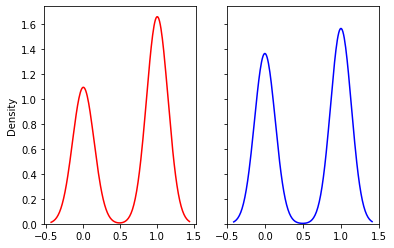

In [26]:
fig,ax = plt.subplots(1,2,sharey=True)
ax[0] = sns.distplot(yhat,hist=False, color="r",ax=ax[0])
ax[1] = sns.distplot(y_train,hist=False,color='b',ax=ax[1])
plt.show()

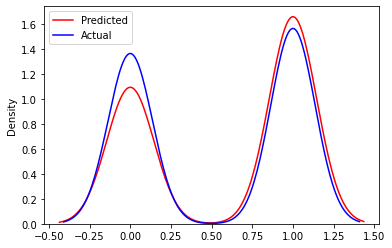

In [27]:
ax = sns.distplot(yhat,hist=False, color="r")
ax1 = sns.distplot(y_train,hist=False,color='b',ax=ax)
plt.legend(["Predicted", "Actual"], loc=0)
plt.show()

## THANK YOU